# Making Model

In [ ]:
import zipfile, os # Membuka lokasi dataset
import tensorflow as tf # Library TensorFlow

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Fungsi augmentasi gambar

In [ ]:
# Get the room datasets

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-21 08:59:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  1.02MB/s    in 71s     

2021-06-21 09:00:20 (964 KB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
# Extract downloaded data above

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# See the extracted data

# Train data
# os.listdir('/tmp/images/train')

# Validation data
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
# Membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# Membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# Membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(train_dir, 'clean')

# Membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(train_dir, 'messy')

In [ ]:
# Augmentasi data training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

# Augmentasi data test
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
# Mempersiapkan data latih

# Data train
train_generator = train_datagen.flow_from_directory(
    train_dir, # Direktori data latih
    target_size = (150, 150), # Mengubah resolusi gambar menjadi 150x150
    batch_size = 4,
    # Karena merupakan klasifikasi 2 kelas maka menggunakan class_mode 'binary'
    class_mode = 'binary'
)

# Data validasi
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Direktori data validasi
    target_size = (150, 150), #Mengubah resolusi gambar menjadi 150x150
    batch_size = 4, 
    # Karena merupakan klasifikasi 2 kelas maka menggunakan class_mode 'binary'
    class_mode = 'binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
# Membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model dengan 'adam optimizer, loss function 'binary_crossentropy' (karena klasifikasi 2 kelas)
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
# Latih model dengan model.fit
model.fit(
    train_generator,
    steps_per_epoch=25, # Berapa batch yang akan dieksekusi pada setiap epoch
    epochs = 20, # Tambahkan epochs jika akurasi model belum optimal
    validation_data = validation_generator, # Menampilkan akurasi pengujian data validasi
    validation_steps = 5, # Berapa batch yang akan dieksekusi pada setiap epoch
    verbose = 2
)

Epoch 1/20
25/25 - 7s - loss: 0.7235 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6966 - accuracy: 0.5700 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6981 - accuracy: 0.5200 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.7035 - accuracy: 0.4800 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.7041 - accuracy: 0.5900 - val_loss: 0.6882 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 6s - loss: 0.6900 - accuracy: 0.5900 - val_loss: 0.6763 - val_accuracy: 0.5500
Epoch 7/20
25/25 - 6s - loss: 0.6307 - accuracy: 0.6900 - val_loss: 0.6402 - val_accuracy: 0.7000
Epoch 8/20
25/25 - 6s - loss: 0.6904 - accuracy: 0.6700 - val_loss: 0.5901 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 6s - loss: 0.6786 - accuracy: 0.5500 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6728 - accuracy: 0.5900 - val_loss: 0.6577 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

# Classification

Saving my_room.jpg to my_room (3).jpg
my_room.jpg
=== Room is : messy === 


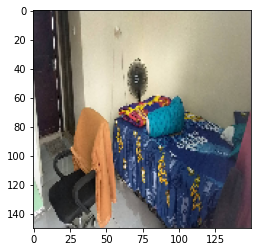

In [ ]:
# Import Library

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
% matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes == 0:
    print('=== Room is : clean ===')
  else:
    print('=== Room is : messy === ')